In [1]:
# Plot simple contrasts from second level analysis testing
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from brainplotlib import brain_plot

SCRIPTS_DIR = os.path.expanduser('~/Documents/got_project')
sys.path.append(SCRIPTS_DIR)
from utils import plot_brain

PROJ_DIR = '/mnt/labdata/got_project'
DATA_DIR = os.path.join(PROJ_DIR, 'ian/data')
FEAT_DIR = os.path.join(DATA_DIR, 'features_renamed')
RES_DIR = os.path.join(DATA_DIR, 'results/simple_contrasts')
FIG_DIR = os.path.join(SCRIPTS_DIR, 'figures/testing/simple_contrasts')
os.makedirs(FIG_DIR, exist_ok=True)

In [2]:
# funcs

def load_feature_names(category):
    fn = os.path.join(FEAT_DIR, f'{category}.tsv')
    feat_df = pd.read_csv(fn, sep='\t', index_col=0)
    return list(feat_df.columns)


def plot_brains(plot_data, titles, vmax=5, cbar_label='t', plot_cbar=True, plot_titles=False):
    vmin = -1 * vmax
    fig, axs = plt.subplots(nrows=1, ncols=len(plot_data), figsize=(12, 8))
    for i, title in enumerate(titles):
        ax = axs[i]
        img = brain_plot(plot_data[i], vmin=vmin, vmax=vmax, cmap='seismic')
        ax.imshow(img)
        ax.axis('off')
        if plot_titles == True:
            ax.set_title(title, fontsize=28)
    if plot_cbar == True:
        norm = plt.Normalize(vmin, vmax)
        cbar = fig.colorbar(
            plt.cm.ScalarMappable(norm=norm, cmap='seismic'),
            ax=axs,
            orientation='horizontal',
            shrink=0.7,
            label=f'{cbar_label}-value',
            )
        cbar.ax.tick_params(labelsize=16) # cbar tick fontsize
        cbar.ax.xaxis.label.set_fontsize(22) # cbar title fontsize

    return fig, axs


In [3]:
# Set vars for reference
groups = ['control', 'DP']
categories = [
    'character_knowledge_features',
    'perceptual_features',
    'person_knowledge_features',
    'social_affective_features',
]

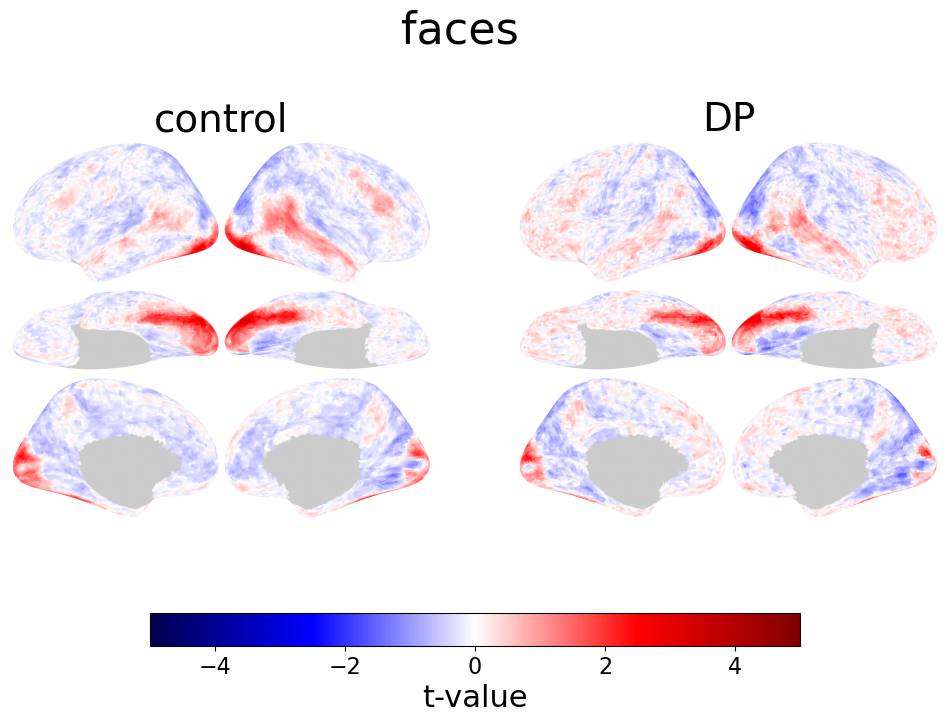

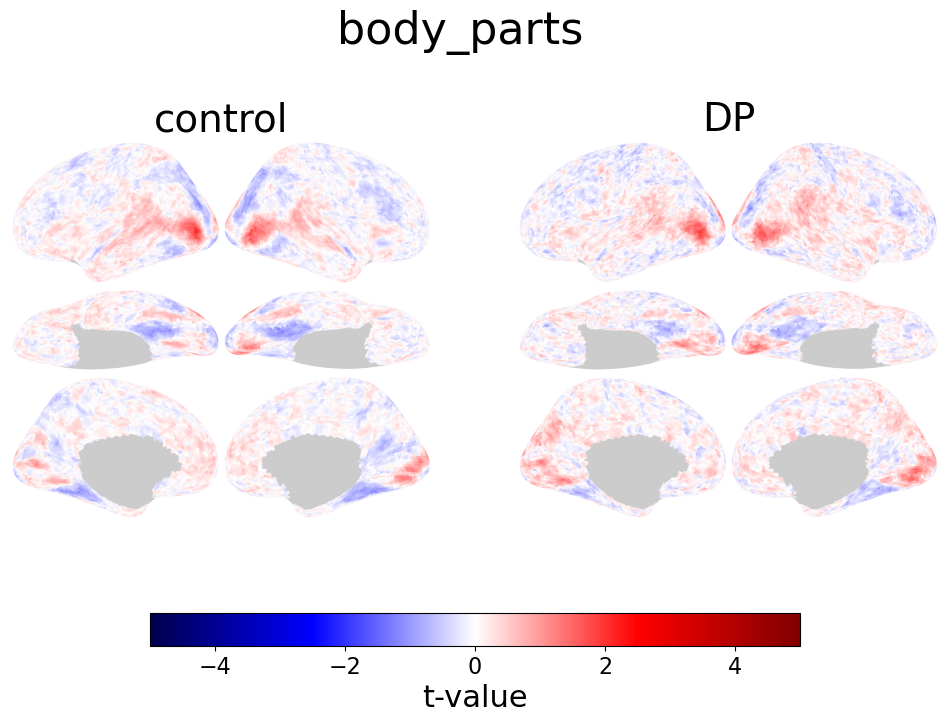

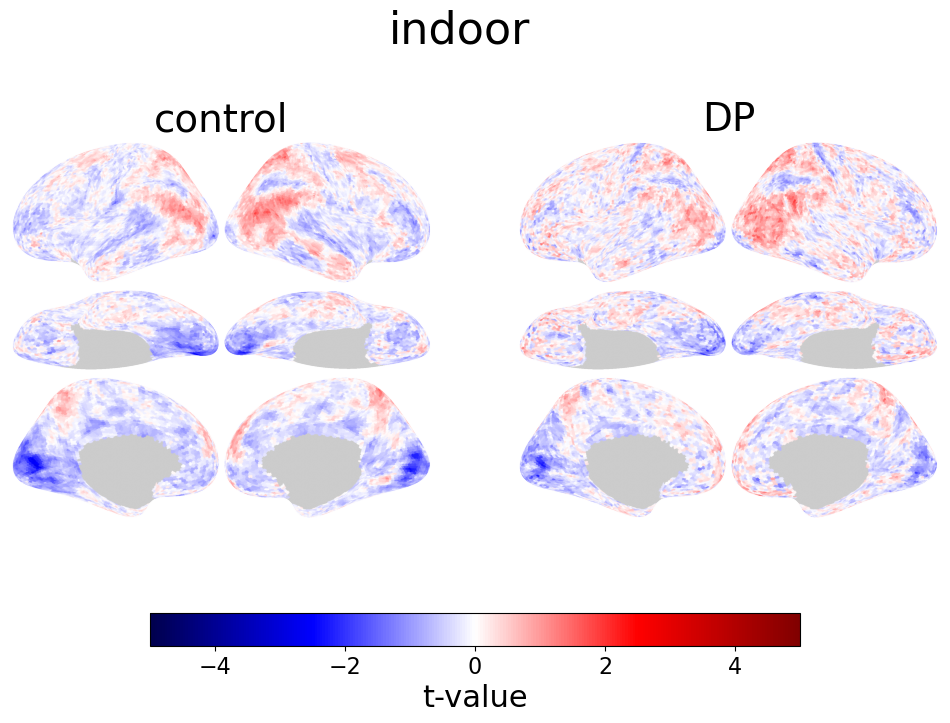

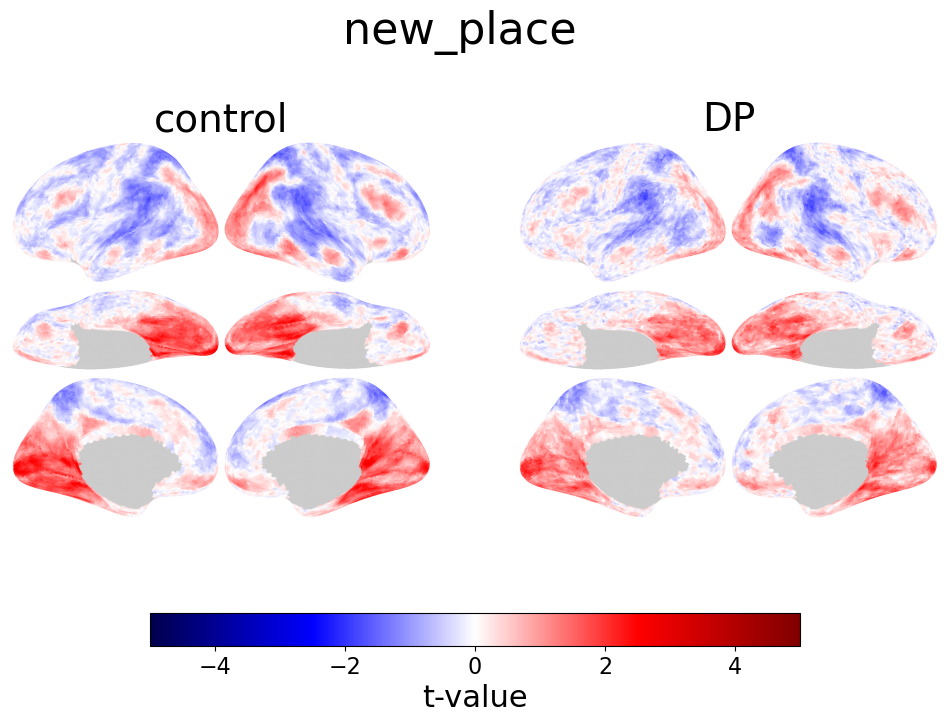

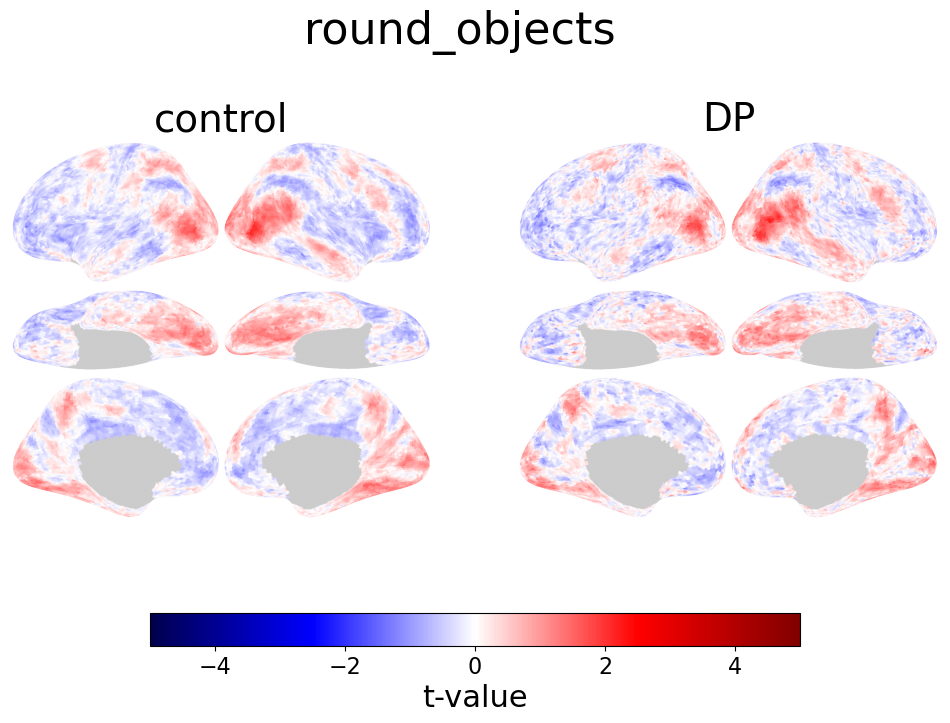

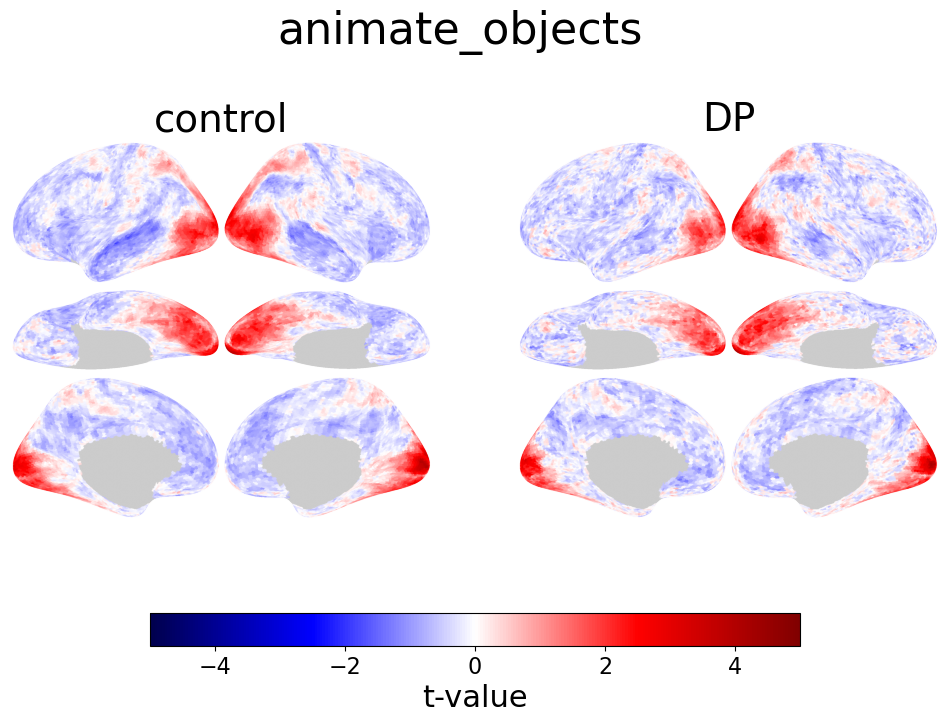

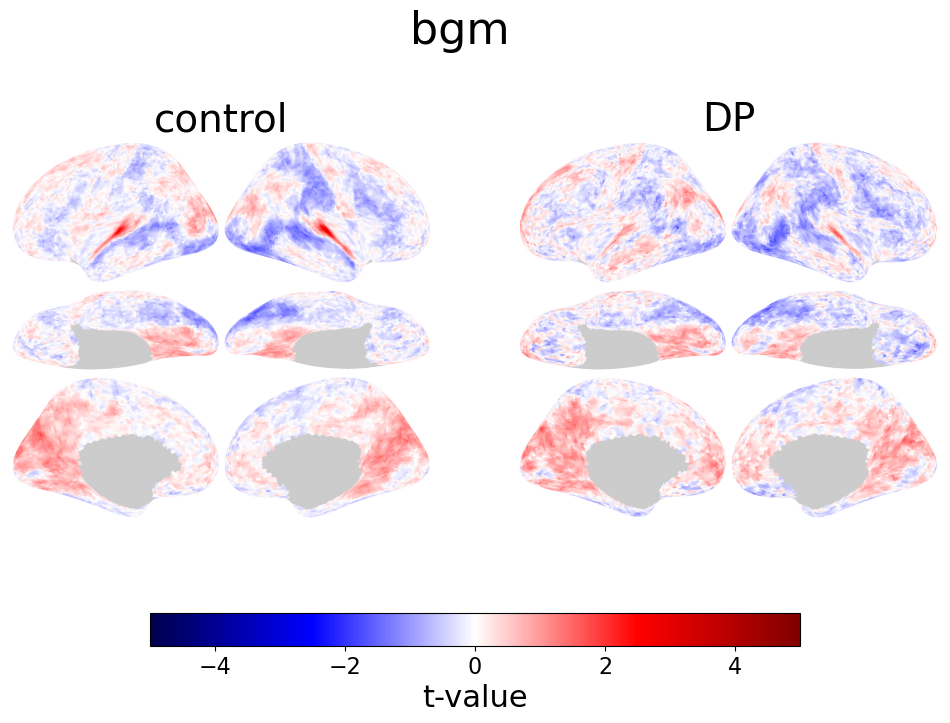

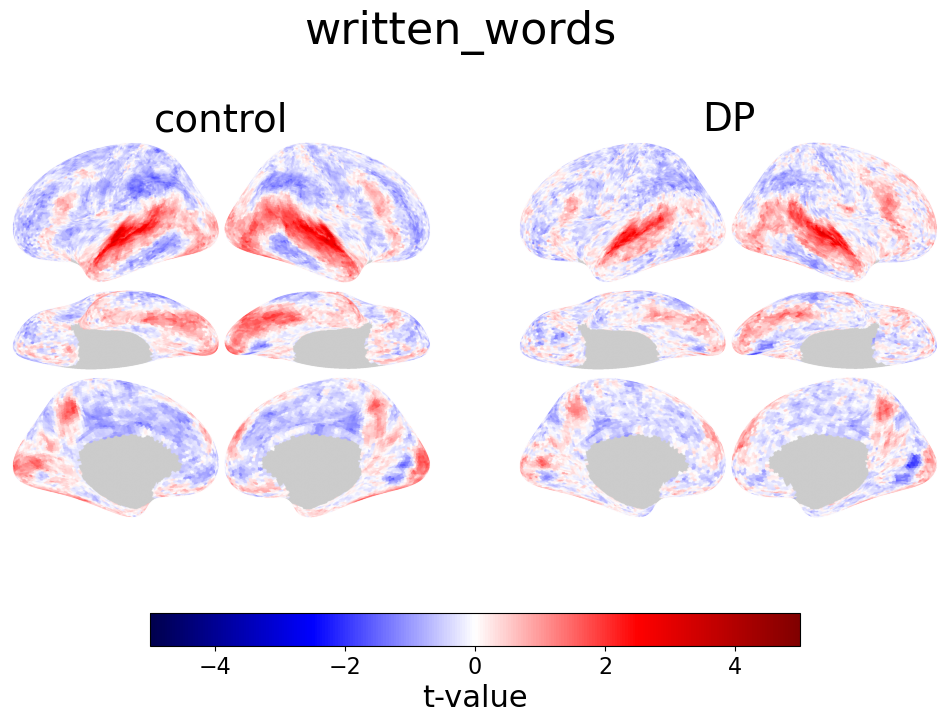

In [4]:
# Plot perceptual features group average t-maps

ordered_feats = load_feature_names('perceptual_features')
for i, feat in enumerate(ordered_feats):

    plot_data = []
    for group in groups:
        fn = f'simple_contrasts_{group}_perceptual_features.npy'
        group_data = np.load(os.path.join(RES_DIR, fn))
        contrast_data = group_data[i, :]
        plot_data.append(contrast_data)
    
    fig, axs = plot_brains(plot_data, groups, plot_titles=True)
    fig.suptitle(feat, fontsize=32)
    plt.show()
        



In [5]:
# Plot all group average t-maps, save to file

for category in categories:
    ordered_feats = load_feature_names(category)
    for i, feat in enumerate(ordered_feats):

        plot_data = []
        for group in groups:
            fn = f'simple_contrasts_{group}_{category}.npy'
            group_data = np.load(os.path.join(RES_DIR, fn))
            contrast_data = group_data[i, :]
            plot_data.append(contrast_data)
        
        fig, axs = plot_brains(plot_data, groups, plot_titles=True)
        fig.suptitle(feat, fontsize=32)
        fig.savefig(os.path.join(FIG_DIR, f'{feat}.png'), dpi=300, bbox_inches='tight')
        plt.close(fig)